In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
!pip install imblearn
import imblearn

In [ ]:
df = pd.read_csv('data_cleanm.csv')
df.count()

Gender                            51699
Checkup                           51699
Exercise                          51699
Heart_Attack                      51699
Diabetes                          51699
Insulin                           51699
Dly_Sugar_Check                   51699
Diabetes_Checkup                  51699
Glycosylated_Hemoglobin           51699
Managing_Diabetes                 51699
Overweight_or_Obese_Calculated    51699
Current_Smokers                   51699
dtype: int64

In [ ]:
#Heart Attack is our target variable and is set to Y. The classification variables from our dataset are set to X. We will be using these to predict.
#Managing Diabetes is not stastically significant so we dropped from modeling.
Y = df[['Heart_Attack']]
X = df[['Gender','Exercise', 'Insulin', 'Overweight_or_Obese_Calculated', 'Dly_Sugar_Check','Diabetes_Checkup','Current_Smokers',"Glycosylated_Hemoglobin"]]

In [ ]:
#Logistic regression modeling.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

logReg = LogisticRegression()
logReg.fit(X_train, y_train.values.ravel())

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print(score)

0.8572533849129593


In [ ]:
#We are able to make reliable preditions in our negaitve class but nothing in the positve class

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1845
         2.0       0.86      1.00      0.92     11080

    accuracy                           0.86     12925
   macro avg       0.43      0.50      0.46     12925
weighted avg       0.73      0.86      0.79     12925



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


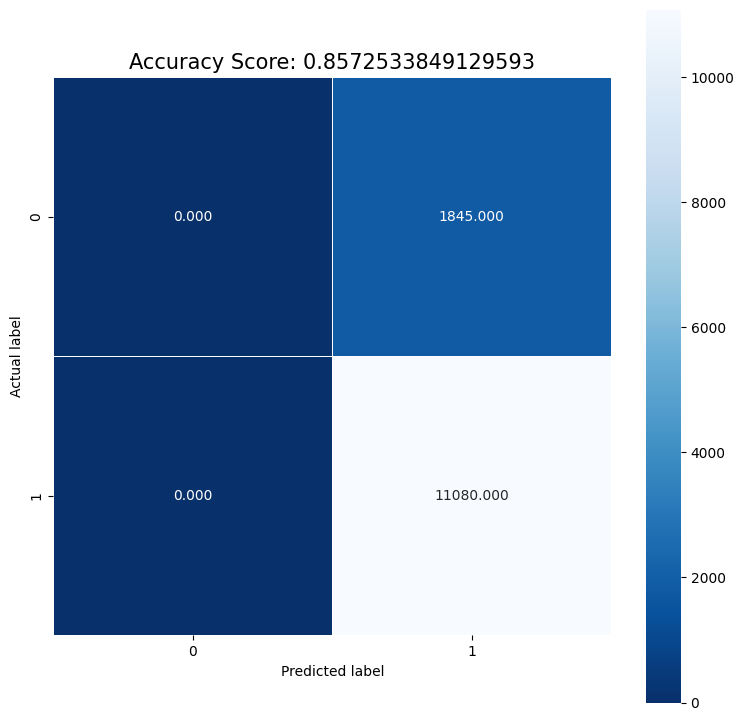

In [ ]:
#Visulization of modeling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

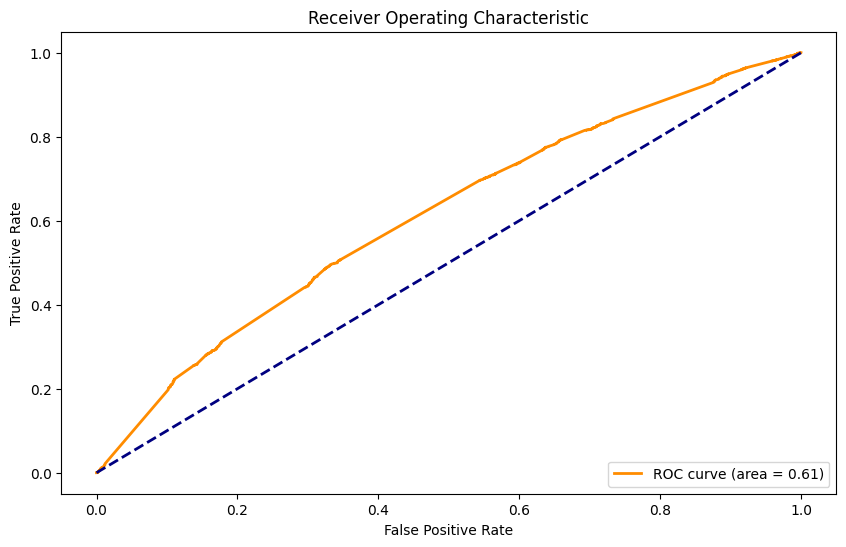

In [ ]:
#ROC Curve for Logistic Regression modeling

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

#Had to convert the 1/2 values to 0/1
lb = LabelBinarizer()
#y_test_binary = lb.fit_transform(y_test)

lb.fit([1, 2])  # Explicitly fit on 1 and 2
y_test_binary = lb.transform(y_test)  # Transform the test labels



predictions_proba = logReg.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test_binary, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Unable to predict a positve in the dependent class, trying Random Forrest
# training RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test



<ipython-input-9-6831f28118a5>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [ ]:
rfc_predicted = rfc_predicted.reshape(12925,1)

rfc_matches = (rfc_predicted == rfc_expected)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))

print(metrics.classification_report(rfc_expected, rfc_predicted))

#Scores still poor with RFC

Overall Accuracy for RFC =  Heart_Attack    0.848897
dtype: float64
              precision    recall  f1-score   support

         1.0       0.21      0.02      0.04      1845
         2.0       0.86      0.99      0.92     11080

    accuracy                           0.85     12925
   macro avg       0.53      0.50      0.48     12925
weighted avg       0.77      0.85      0.79     12925



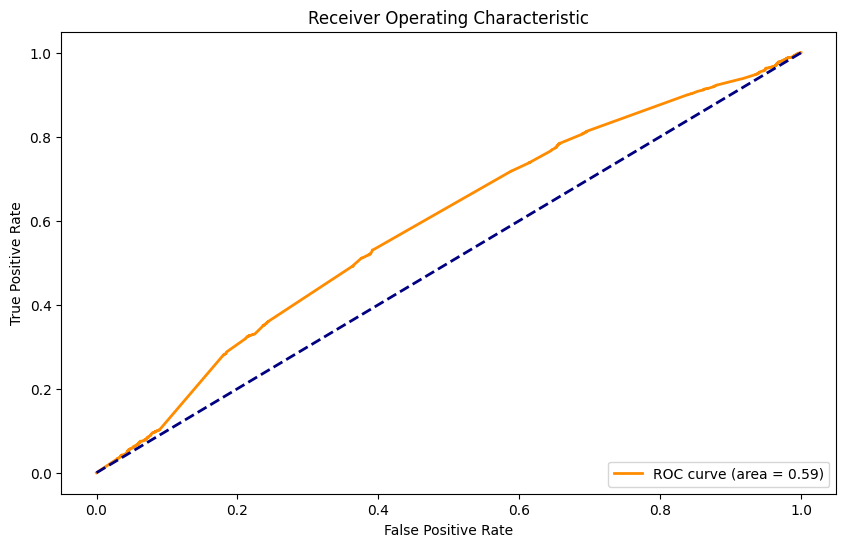

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)


predictions_proba = 1- rfc.predict_proba(X_test)[:, 0]


fpr, tpr, _ = roc_curve(y_test_binary, predictions_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

#KNN becomes one of our better perfoming models but the ROC Curve shows that our predictions are not better than random.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7644874274661508
              precision    recall  f1-score   support

         1.0       0.18      0.18      0.18      1845
         2.0       0.86      0.86      0.86     11080

    accuracy                           0.76     12925
   macro avg       0.52      0.52      0.52     12925
weighted avg       0.76      0.76      0.76     12925



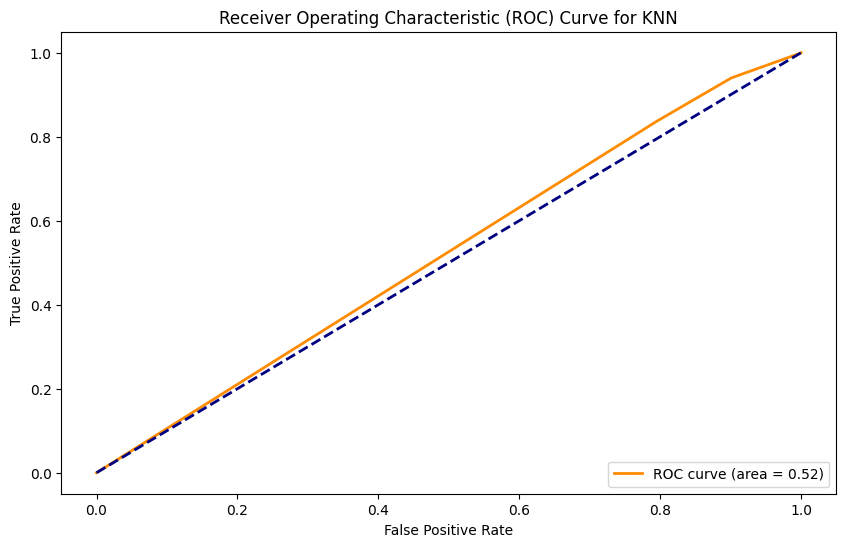

In [ ]:
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)


y_train_binary = y_train_binary.ravel()
y_test_binary = y_test_binary.ravel()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train_binary)

predictions_proba = knn.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

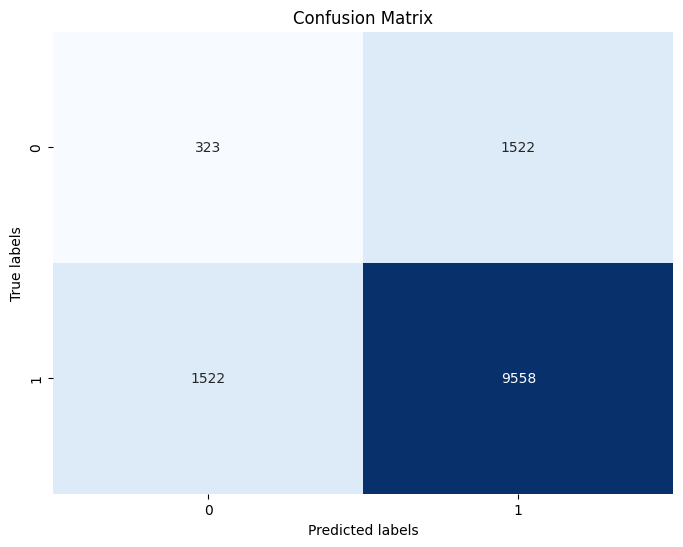

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Resampling the dependent class to see if that will lead to better results

from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



logReg = LogisticRegression()
logReg.fit(X_train, y_train.values.ravel())

predictions = logReg.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

#Scores are better when resampled but still not satsifactory

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1845
         2.0       0.86      1.00      0.92     11080

    accuracy                           0.86     12925
   macro avg       0.43      0.50      0.46     12925
weighted avg       0.73      0.86      0.79     12925



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


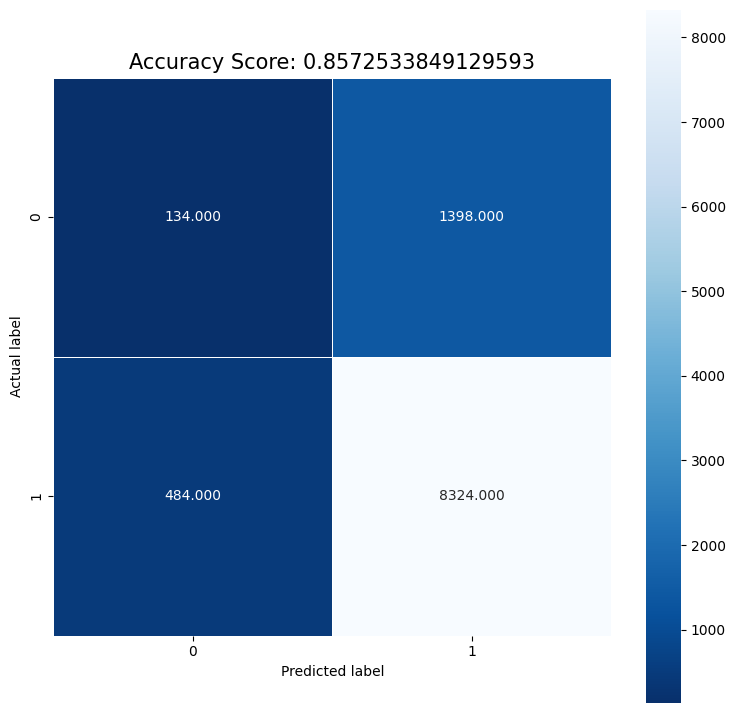

In [ ]:
#Confusion Matrix for Resampled Logistic Regression Modeling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

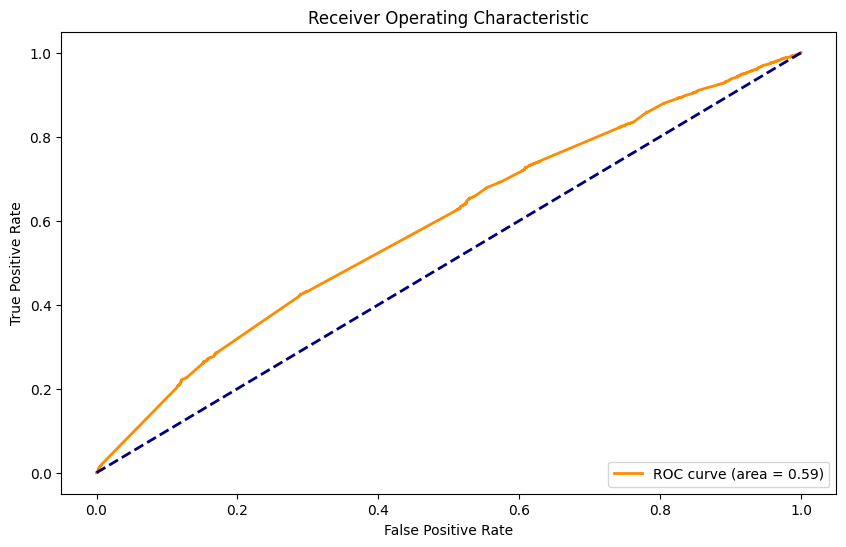

In [ ]:
#ROC Curve for logistic regression resampled
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc


lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)


predictions_proba = logReg.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test_binary, predictions_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Trying Random Forrest resampled

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


rfc_predicted = rfc.predict(X_test)


print(metrics.classification_report(y_test, rfc_predicted))

#Still poor scores

/home/students/atblackb/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

         1.0       0.20      0.07      0.10      1532
         2.0       0.85      0.96      0.90      8808

    accuracy                           0.82     10340
   macro avg       0.53      0.51      0.50     10340
weighted avg       0.76      0.82      0.78     10340



In [ ]:
#Trying XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label= y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3
}


num_round = 100
model = xgb.train(params, dtrain, num_round)


y_pred = model.predict(dtest)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost: {accuracy * 100:.2f}%")


report1 = classification_report(y_test, y_pred)
print(report1)

#Best scores yet, but unsatsifcatory

Accuracy of XGBoost: 83.51%
              precision    recall  f1-score   support

         1.0       0.23      0.05      0.08      1532
         2.0       0.85      0.97      0.91      8808

    accuracy                           0.84     10340
   macro avg       0.54      0.51      0.49     10340
weighted avg       0.76      0.84      0.79     10340



In [ ]:
#Finally KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print(classification_report(y_test, predictions))

/home/students/atblackb/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.7672147001934236
              precision    recall  f1-score   support

         1.0       0.19      0.17      0.18      1532
         2.0       0.86      0.87      0.86      8808

    accuracy                           0.77     10340
   macro avg       0.52      0.52      0.52     10340
weighted avg       0.76      0.77      0.76     10340



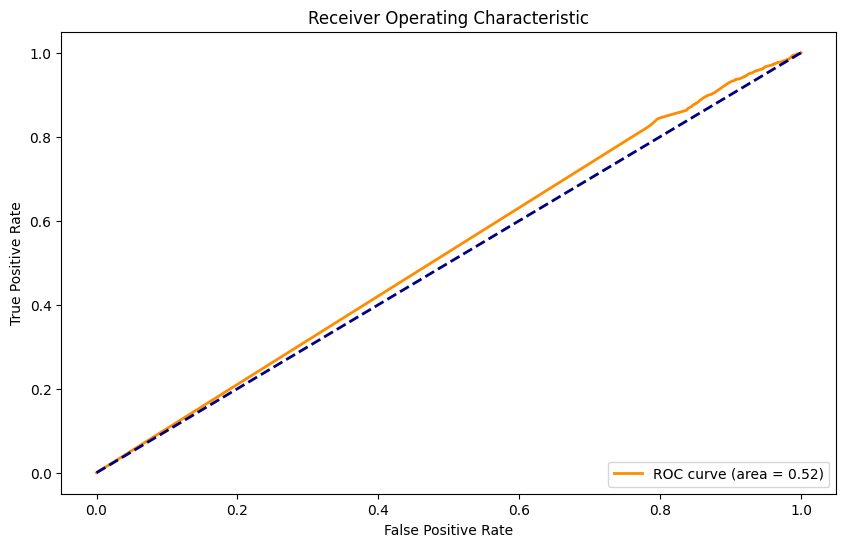

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)


predictions_proba = 1- rfc.predict_proba(X_test)[:, 0]


fpr, tpr, _ = roc_curve(y_test_binary, predictions_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

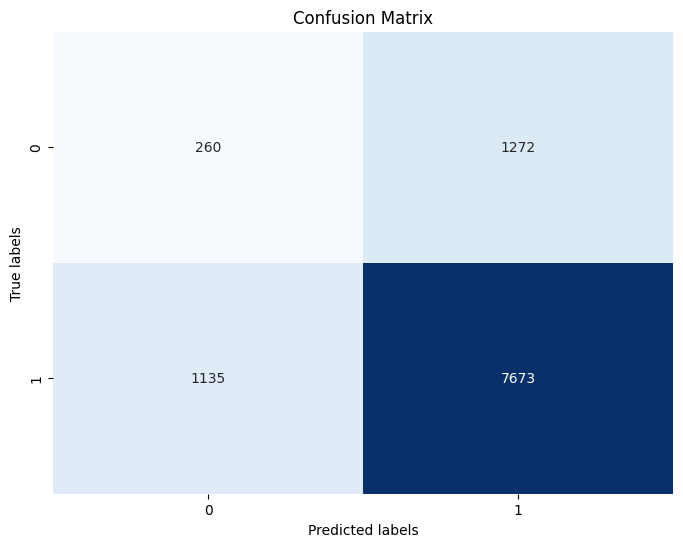

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

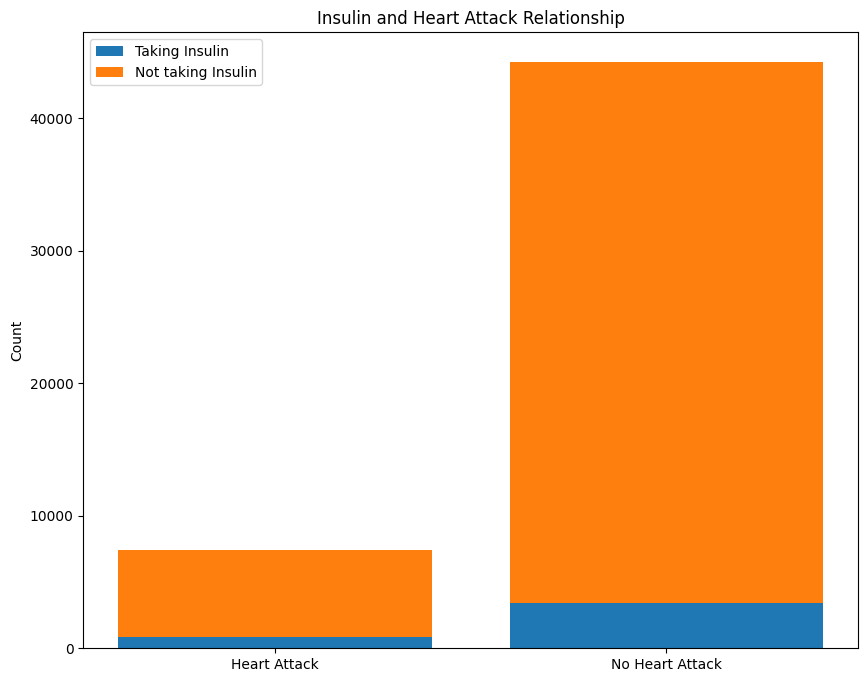

In [ ]:
#The below visulazations are an attempt to show why we got poor scores. We wanted to show the ratios of positive/negative values for our features
#in some of the classes. This shows that our dependent class doesn't have much different ratios than our indenpendnt class which lead to our model
#having trouble predicting.
insulin_condition_1 = (df['Heart_Attack'] == 1.0) & (df['Insulin'] == 1.0)
insulin_condition_2 = (df['Heart_Attack'] == 2.0) & (df['Insulin'] == 1.0)
insulin_condition_3 = (df['Heart_Attack'] == 1.0) & (df['Insulin'] == 2.0)
insulin_condition_4 = (df['Heart_Attack'] == 2.0) & (df['Insulin'] == 2.0)


counts_insulin = df.groupby(['Heart_Attack', 'Insulin']).size().unstack().fillna(0)


fig, axs = plt.subplots(figsize=(10, 8))


axs.bar(counts_insulin.index, counts_insulin[1.0], label='Taking Insulin')
axs.bar(counts_insulin.index, counts_insulin[2.0], bottom=counts_insulin[1.0], label='Not taking Insulin')

axs.set_title('Insulin and Heart Attack Relationship')
axs.set_ylabel('Count')
axs.set_xticks([1, 2])
axs.set_xticklabels(['Heart Attack', 'No Heart Attack'])
axs.legend()

plt.show()

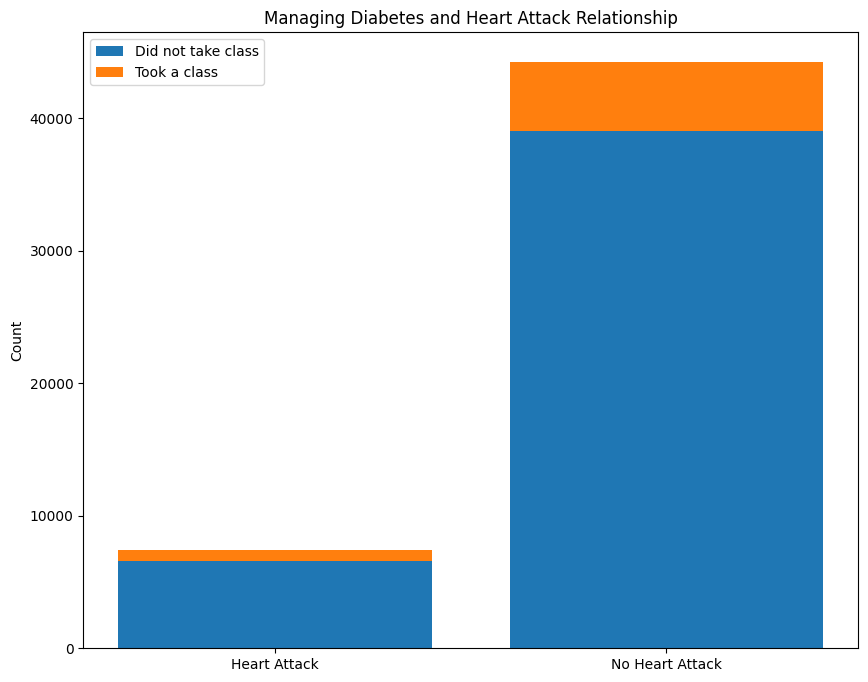

In [ ]:

managing_diabetes_condition_1 = (df['Heart_Attack'] == 1.0) & (df['Managing_Diabetes'] == 1.0)
managing_diabetes_condition_2 = (df['Heart_Attack'] == 2.0) & (df['Managing_Diabetes'] == 1.0)
managing_diabetes_condition_3 = (df['Heart_Attack'] == 1.0) & (df['Managing_Diabetes'] == 2.0)
managing_diabetes_condition_4 = (df['Heart_Attack'] == 2.0) & (df['Managing_Diabetes'] == 2.0)


counts_managing_diabetes = df.groupby(['Heart_Attack', 'Managing_Diabetes']).size().unstack().fillna(0)


fig, axs = plt.subplots(figsize=(10, 8))

axs.bar(counts_managing_diabetes.index, counts_managing_diabetes[1.0], label='Did not take class')
axs.bar(counts_managing_diabetes.index, counts_managing_diabetes[2.0], bottom=counts_managing_diabetes[1.0], label='Took a class')

axs.set_title('Managing Diabetes and Heart Attack Relationship')
axs.set_ylabel('Count')
axs.set_xticks([1, 2])
axs.set_xticklabels(['Heart Attack', 'No Heart Attack'])
axs.legend()

plt.show()

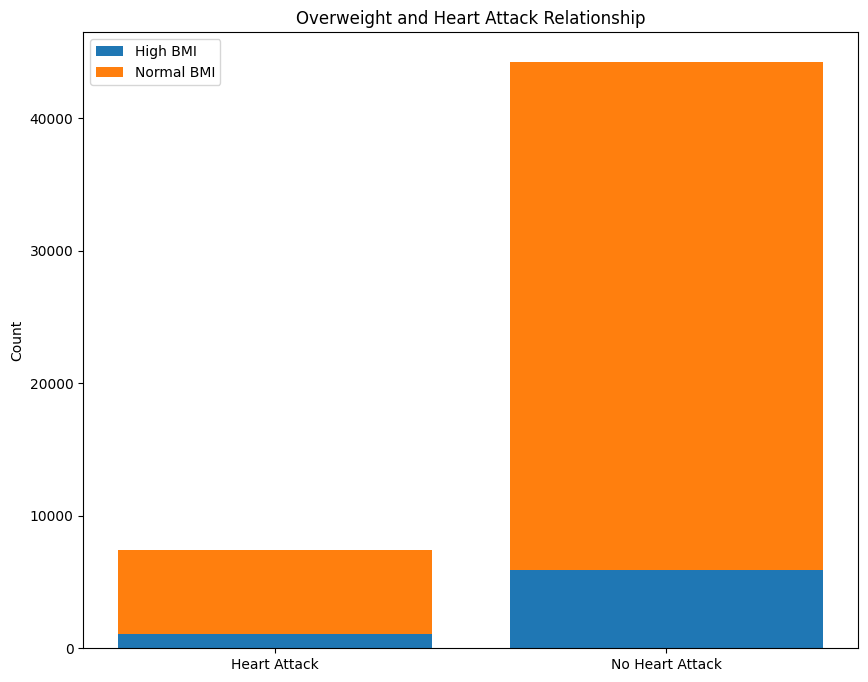

In [ ]:

overweight_condition_1 = (df['Heart_Attack'] == 1.0) & (df['Overweight_or_Obese_Calculated'] == 1.0)
overweight_condition_2 = (df['Heart_Attack'] == 2.0) & (df['Overweight_or_Obese_Calculated'] == 1.0)
exercise_condition_3 = (df['Heart_Attack'] == 1.0) & (df['Overweight_or_Obese_Calculated'] == 2.0)
exercise_condition_4 = (df['Heart_Attack'] == 2.0) & (df['Overweight_or_Obese_Calculated'] == 2.0)

counts_overweight = df.groupby(['Heart_Attack', 'Overweight_or_Obese_Calculated']).size().unstack().fillna(0)


fig, axs = plt.subplots(figsize=(10, 8))


axs.bar(counts_overweight.index, counts_overweight[1.0], label='High BMI')
axs.bar(counts_overweight.index, counts_overweight[2.0], bottom=counts_overweight[1.0], label='Normal BMI')

axs.set_title('Overweight and Heart Attack Relationship')
axs.set_ylabel('Count')
axs.set_xticks([1, 2])
axs.set_xticklabels(['Heart Attack', 'No Heart Attack'])
axs.legend()

plt.show()

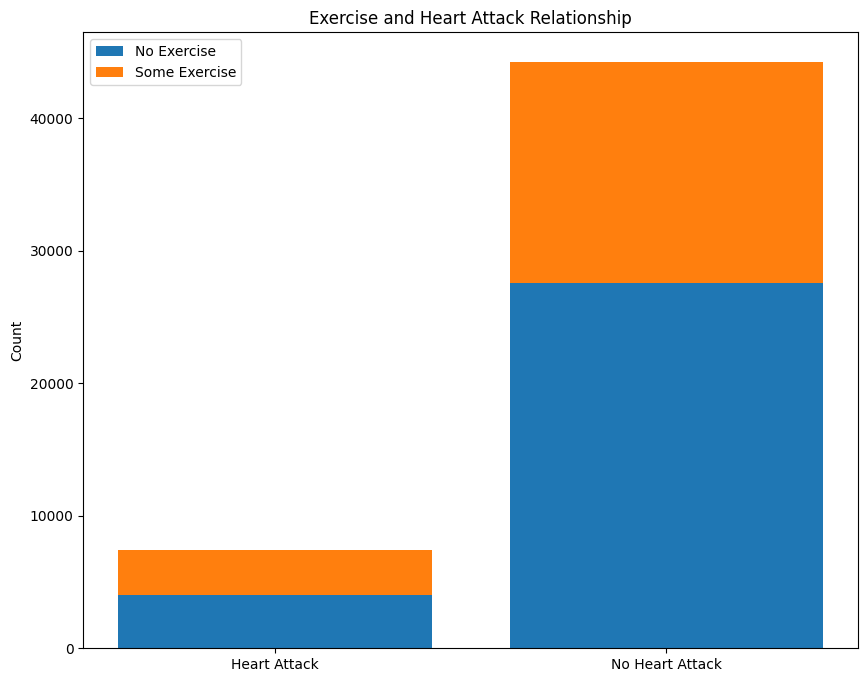

In [ ]:

exercise_condition_1 = (df['Heart_Attack'] == 1.0) & (df['Exercise'] == 1.0)
exercise_condition_2 = (df['Heart_Attack'] == 2.0) & (df['Exercise'] == 1.0)
exercise_condition_3 = (df['Heart_Attack'] == 1.0) & (df['Exercise'] == 2.0)
exercise_condition_4 = (df['Heart_Attack'] == 2.0) & (df['Exercise'] == 2.0)


counts_exercise = df.groupby(['Heart_Attack', 'Exercise']).size().unstack().fillna(0)


fig, axs = plt.subplots(figsize=(10, 8))

axs.bar(counts_exercise.index, counts_exercise[1.0], label='No Exercise')
axs.bar(counts_exercise.index, counts_exercise[2.0], bottom=counts_exercise[1.0], label='Some Exercise')

axs.set_title('Exercise and Heart Attack Relationship')
axs.set_ylabel('Count')
axs.set_xticks([1, 2])
axs.set_xticklabels(['Heart Attack', 'No Heart Attack'])
axs.legend()

plt.show()

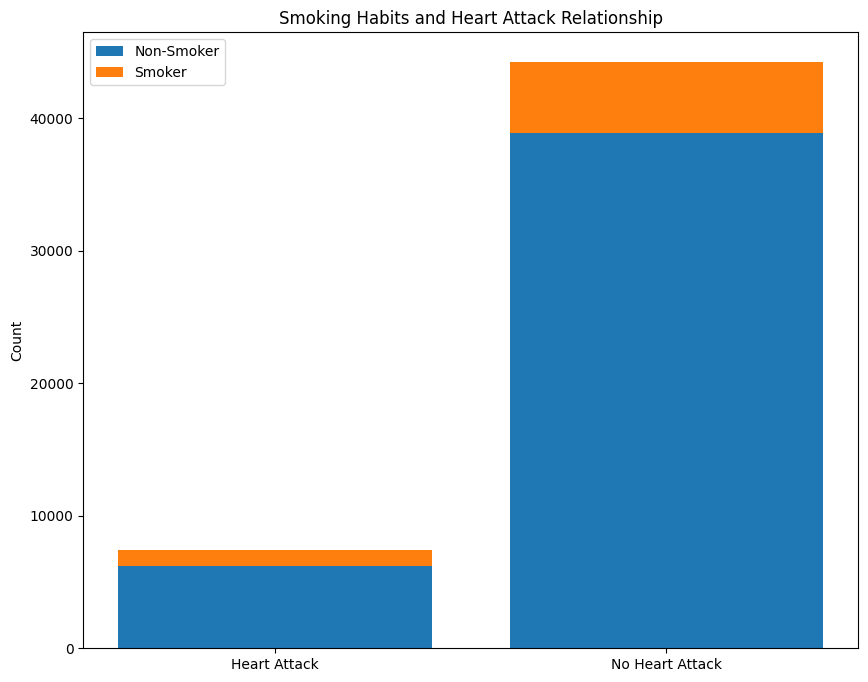

In [ ]:

smokers_condition_1 = (df['Heart_Attack'] == 1.0) & (df['Current_Smokers'] == 1.0)
smokers_condition_2 = (df['Heart_Attack'] == 2.0) & (df['Current_Smokers'] == 1.0)
smokers_condition_3 = (df['Heart_Attack'] == 1.0) & (df['Current_Smokers'] == 2.0)
smokers_condition_4 = (df['Heart_Attack'] == 2.0) & (df['Current_Smokers'] == 2.0)


counts_smokers = df.groupby(['Heart_Attack', 'Current_Smokers']).size().unstack().fillna(0)


fig, axs = plt.subplots(figsize=(10, 8))


axs.bar(counts_smokers.index, counts_smokers[1.0], label='Non-Smoker')
axs.bar(counts_smokers.index, counts_smokers[2.0], bottom=counts_smokers[1.0], label='Smoker')

axs.set_title('Smoking Habits and Heart Attack Relationship')
axs.set_ylabel('Count')
axs.set_xticks([1, 2])
axs.set_xticklabels(['Heart Attack', 'No Heart Attack'])
axs.legend()

plt.show()